## Основы NumPy: массивы и векторные вычисления.ipynb

In [1]:
import numpy as np

## Важное о NumPy

🟢 NumPy хранит данные в непрерывном блоке памяти независимо от
других встроенных объектов Python.

🟢 Алгоритмы NumPy, написанные на языке C, могут работать c этим блоком, не обременяя себя проверкой типов и другими накладными расходами.

🟢 Массивы NumPy потребляют гораздо меньше памяти, чем встроенные в Python последовательности.


---


🚀 В NumPy сложные операции применяются к массивам целиком, так
что отпадает необходимость в циклах for, которые для больших последовательностей могут работать медленно.

🚀 NumPy быстрее кода на чистом Python, потому что в написанных на C алгоритмах нет накладных расходов, свойственных обычному интерпретируемому Python-коду.

array_vs_list-5020-729d1a.png.avif

# Эксперимент производительности

In [3]:
my_arr = np.arange(2000000)
my_list = list(range(2000000))

In [132]:
%timeit my_arr2 = my_arr * 2

1.95 ms ± 79.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [133]:
%timeit my_list2 = [x * 2 for x in my_list]

63.1 ms ± 2.08 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Объект `ndarray` для представления N-мерного массива

✅ `ndarray`  - это многомерный контейнер 🧰 для **`гомогенных данных`**, т. е. в нем могут храниться только элементы одного типа.


✅ Массивы позволяют выполнять математические
операции над целыми блоками данных, применяя такой же синтаксис как для соответствующих операций над скалярами (числами).



In [134]:
data = np.array([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])

In [136]:
data + 2 # ко всем элемента прибавляется 2

array([[3., 4., 5.],
       [6., 7., 8.]])

In [137]:
data * 2 #  все элементы умножаются на 2

array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]])

In [138]:
data + data # поэлементное сложение элементов

array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]])

In [139]:
data * data # поэлементное умножение элементов

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [140]:
data == data # поэлементное сравнение

array([[ True,  True,  True],
       [ True,  True,  True]])

In [75]:
data > data

array([[False, False, False],
       [False, False, False]])

### У любого массива есть атрибут **`shape`** - кортеж, описывающий размер по каждому измерению

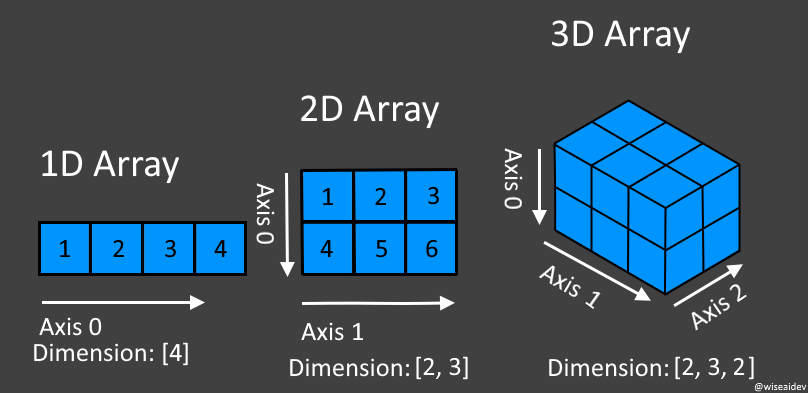

In [141]:
data

array([[1., 2., 3.],
       [4., 5., 6.]])

In [142]:
data = np.array([[[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]]])

In [143]:
data.shape

(1, 2, 3)

**Axis - ось**

In [144]:
vector = np.array([1.0, 2.0, 4.0, 8.0])
print(vector)

[1. 2. 4. 8.]


In [145]:
matrix = np.array([[1.0, 2.0],
                   [4.0, 8.0]])
print(matrix)

[[1. 2.]
 [4. 8.]]


In [146]:
array3d = np.array([[[1.0, 2.0],
                    [4.0, 8.0]]])
print(array3d)

[[[1. 2.]
  [4. 8.]]]


In [147]:
print(vector.shape)
print(matrix.shape)
print(array3d.shape)

(4,)
(2, 2)
(1, 2, 2)


### У любого массива есть атрибут **`dtype`** - объект, описывающий тип данных в массиве

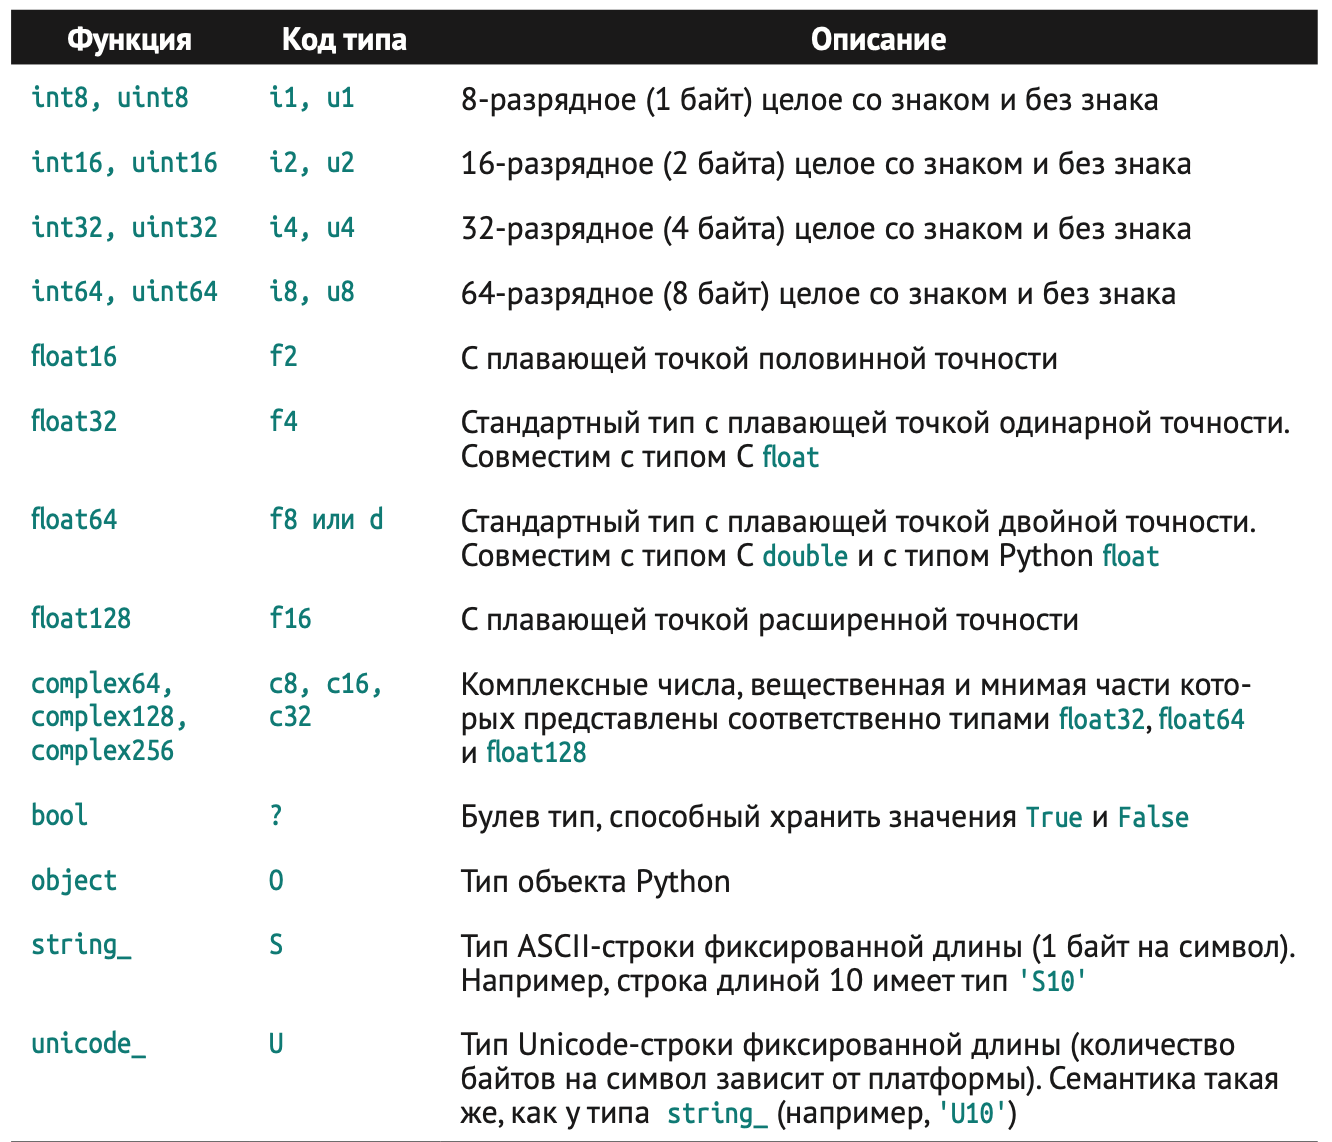

## Что такое числа с плавающей точкой?

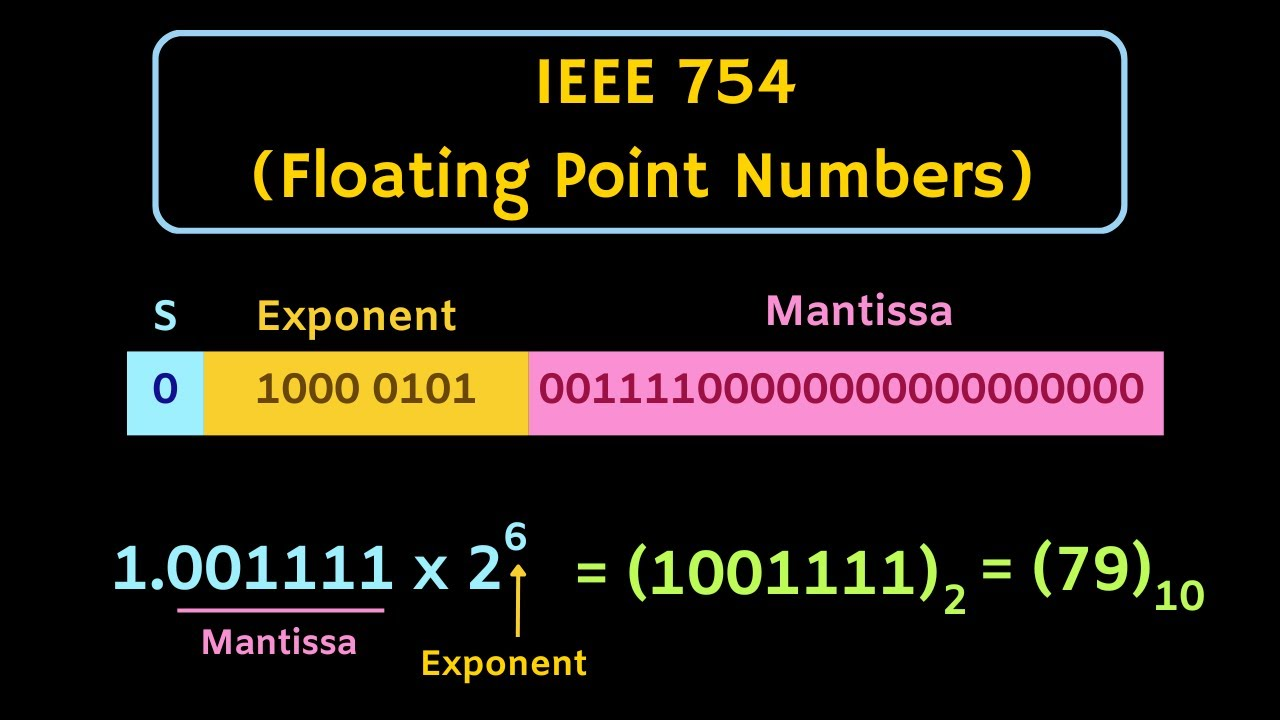

In [148]:
matrix = np.array([[1.0, 2.0],
                   [4.0, 8.0]])
matrix.dtype

dtype('float64')

In [149]:
type(matrix)

numpy.ndarray

In [150]:
matrix

array([[1., 2.],
       [4., 8.]])

In [151]:
matrix.nbytes

32

In [152]:
matrix = matrix.astype('int64')
matrix.dtype

dtype('int64')

In [153]:
matrix

array([[1, 2],
       [4, 8]])

In [154]:
matrix.nbytes

32

In [155]:
matrix = matrix.astype('int32')

In [156]:
matrix.dtype

dtype('int32')

In [157]:
matrix.nbytes

16

# 🔢  NaN (Not a Number) в NumPy

## 📌 Что такое NaN?
`NaN` (*Not a Number*) — это специальное значение, определённое в стандарте **IEEE 754**, которое используется в **NumPy** для представления **отсутствующих, неопределённых или некорректных числовых данных**.  

### 🔥 Когда появляется NaN?
`NaN` возникает в следующих ситуациях:
- Деление **0 / 0**
- Вычисление `sqrt(-1)`
- Преобразование некорректной строки в число: `float("abc")`
- Ручное добавление отсутствующих значений
- Операции с уже имеющимся `NaN`: `NaN + 5 → NaN`

In [158]:
arr = np.array([1.0, np.nan, 3.0, np.nan])
print(arr)

[ 1. nan  3. nan]


Проверка на NaN

In [159]:
print(np.isnan(np.nan))  # True
print(np.isnan(5.0))     # False

True
False


⚠ Важно! NaN не равно самому себе:

In [160]:
print(np.nan == np.nan)  # False!
print(np.nan != np.nan)  # True!

False
True


## **Indexing(индексация) и Slicing (срезы)**

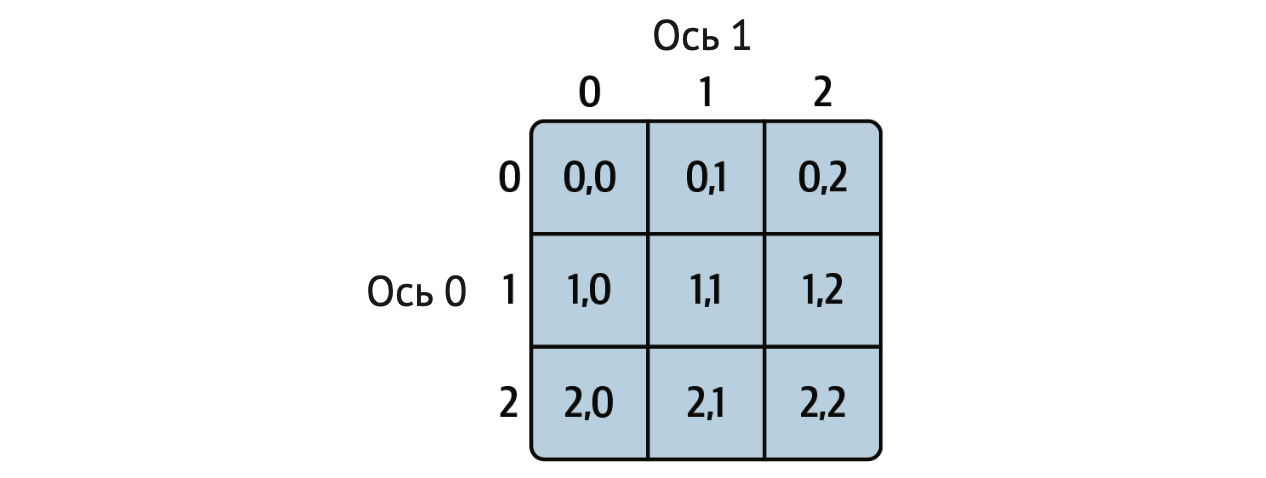

In [161]:
array2d = np.array([[0.0, 0.1, 0.2], [1.0, 1.1, 1.2], [2.0, 2.1, 2.2]])
array2d

array([[0. , 0.1, 0.2],
       [1. , 1.1, 1.2],
       [2. , 2.1, 2.2]])

In [162]:
array2d[1]

array([1. , 1.1, 1.2])

In [163]:
array2d[1, 1] # предпочтительный вариант

np.float64(1.1)

In [164]:
array2d[1][1]

np.float64(1.1)

###**Разница между array2d[1,1] и array2d[1][1]**
`array2d[1,1]`: Используется синтаксис многомерного индекса NumPy. Этот способ индексации позволяет сразу обращаться к элементу двумерного массива по индексам строки и столбца. NumPy оптимизирован для работы с такими массивами, и это самый быстрый и предпочтительный способ обращения к элементам.

`array2d[1][1]`: Здесь сначала извлекается первая строка массива (`array2d[1]`), после чего берется первый элемент этой строки (`[1]`). То есть происходит два отдельных вызова индексации. Хотя результат тот же, но это менее эффективно, поскольку каждый раз создается временный срез (например, `array2d[1]`) перед извлечением второго элемента.


**Срезы**

In [166]:
arr = np.array([[0,1,2],[3,4,5],[6,7,8]], dtype=np.int64)
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [ ]:
arr[2:,:]

array([[6, 7, 8]])

In [171]:
arr[2:,:] = arr[2:,:] * 2
arr

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [12, 14, 16]])

In [172]:
arr[:, 1:2]

array([[ 1],
       [ 4],
       [14]])

### **Сравнение со срезами стандартных Python-последовательностей**

Срезы в Python используются для работы c последовательностями — списками, кортежами, строками и другими итерируемыми объектами.

**Одномерность:** Встроенная поддержка срезов ориентирована на одномерные структуры данных. Это значит, что вы можете выбрать несколько элементов из списка, строки или другого одномерного контейнера.

```
arr = [10, 20, 30, 40, 50]
print(arr[1:4])  # Результат: [20, 30, 40]
```

**Копирование результата:** Когда вы делаете срез, создается новая копия элементов, находящихся внутри среза. Изменение результирующего среза не повлияет на исходный объект.


In [173]:
list1 = [[0, 1, 2], [3, 4, 5,], [6, 7, 8]]
list1

[[0, 1, 2], [3, 4, 5], [6, 7, 8]]

In [174]:
list1[2:][:] # возвращаем последнюю строчку из списка

[[6, 7, 8]]

In [175]:
list1[2:][2:] # отсутсвие поддержки многомерности

[]

## **Булево индексирование**

Булево индексирование - это техника доступа к элементам массива в **NumPy**, основанная на использовании **булевой маски**. Булевая маска представляет собой массив того же размера, что и основной массив, содержащий логические значения `True` и `False`. При применении булевого индексирования выбираются те элементы основного массива, которым соответствуют значения `True` в маске.

In [176]:
names = np.array(["Sergey", "Ivan", "Ivan", "Sergey", "Alexey", "Dmitrij", "Pavel"])
mask = names == "Sergey"
mask

array([ True, False, False,  True, False, False, False])

In [177]:
numbers = np.array([1, 2, 3, 4, 5, 6, 7])
numbers[mask] # вернется булев массив

array([1, 4])

Ключевые слова Python `and` и `or` с булевыми массивами не работают.

Используйте вместо них: **`& (логическое И)  | (логическое ИЛИ)`**.

In [178]:
mask = (names == "Sergey") | (names == "Ivan") # строим маску используя оператор логическое ИЛИ |
mask

array([ True,  True,  True,  True, False, False, False])

In [179]:
numbers[mask] # отбираем по маске


array([1, 2, 3, 4])

In [180]:
numbers[~mask] # инверсия - оператор ~ отбираем по инверсии маски

array([5, 6, 7])

## **Fancy indexing** (индексирование с помощью целочисленных массивов).

numpy-fancy-indexing.svg

Fancy indexing (или "индексирование с помощью целочисленных массивов") — это метод выборки элементов из массива NumPy, используя другой массив целых чисел в качестве индекса. Этот подход позволяет извлекать произвольные элементы из исходного массива, задавая их позиции в виде списка или массива индексов.

In [181]:
arr = np.array([10, 20, 30, 40, 50])

# Массив индексов
indices = np.array([0, 2, 4])

# Fancy indexing
arr[indices]


array([10, 30, 50])

**Произвольный порядок:** Индексы могут быть расположены в любом порядке, включая повторяющиеся значения. Например, можно получить один и тот же элемент несколько раз:

In [182]:
# Массив индексов
indices = np.array([4, 0, 0])

# Fancy indexing
arr[indices]

array([50, 10, 10])

**Поддержка многомерных массивов:** Fancy indexing также применимо к многомерным массивам, где можно задавать индексы для каждой оси:

In [183]:
arr_2d = np.array([[1, 2, 3], # заберем отсюда 2
                   [4, 5, 6],
                   [7, 8, 9]]) # а отсюда 9

row_indices = np.array([0, 2]) # индексы рядов
col_indices = np.array([1, 2]) # индексы колонок

arr_2d[row_indices, col_indices]

array([2, 9])

❗ **Прихотливое индексирование, в отличие от вырезания,
всегда копирует данные в новый массив, когда результат присваивается новой
переменной**

## **Транспонирование массивов**

Транспонирование массивов — это операция, которая меняет местами строки и столбцы двумерного массива. Если представить массив как таблицу или как матрицу, то транспонирование поворачивает её таким образом, что строки становятся столбцами, а столбцы — строками.

$$
A = \begin{bmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22} \\
a_{31} & a_{32} \\
a_{41} & a_{42}
\end{bmatrix}
$$





$$
A^T = \begin{bmatrix}
a_{11} & a_{21} & a_{31} & a_{41} \\
a_{12} & a_{22} & a_{32} & a_{42}
\end{bmatrix}
$$

In [184]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11], [12, 13, 14]])
arr

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [185]:
arr.T # транспонированная матрица

array([[ 0,  3,  6,  9, 12],
       [ 1,  4,  7, 10, 13],
       [ 2,  5,  8, 11, 14]])

# **Математика в Numpy**

### **Умножение матриц**

$$
C = A \times B \quad \text{где} \quad c_{ij} = \sum_{k=1}^{n} a_{ik} \cdot b_{kj}
$$

$$
A = \begin{bmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{bmatrix}, \quad
B = \begin{bmatrix}
b_{11} & b_{12} \\
b_{21} & b_{22}
\end{bmatrix}, \quad
C = A \times B = \begin{bmatrix}
a_{11}b_{11} + a_{12}b_{21} & a_{11}b_{12} + a_{12}b_{22} \\
a_{21}b_{11} + a_{22}b_{21} & a_{21}b_{12} + a_{22}b_{22}
\end{bmatrix}
$$

In [186]:
A = np.array([[1,2],[3,4]])
B = np.array([[4,3],[2,1]])

print(A @ B) # предпочтительный вариант

# или

print(np.dot(A,B))

# или

print(np.matmul(A,B))

[[ 8  5]
 [20 13]]
[[ 8  5]
 [20 13]]
[[ 8  5]
 [20 13]]


**Скалярное произведение векторов**

$$
\mathbf{a} \cdot \mathbf{b} = \sum_{i=1}^{n} a_i b_i
$$

$$
\vec{a} \cdot \vec{b} = a_1 b_1 + a_2 b_2 + \dots + a_n b_n
$$

In [187]:
v1 = np.array([1, 2, 3, 4])
v2 = np.array([4, 3, 2, 1])

print(v1 @ v2) # и снова оператор @ -> вернет скаляр

20


**Умножение матрицы на вектор**

$$
\mathbf{A} \cdot \mathbf{v} = \begin{bmatrix}
a_{11} & a_{12} & a_{13} \\
a_{21} & a_{22} & a_{23}
\end{bmatrix}
\cdot
\begin{bmatrix}
v_1 \\
v_2 \\
v_3
\end{bmatrix}
=
\begin{bmatrix}
a_{11}v_1 + a_{12}v_2 + a_{13}v_3 \\
a_{21}v_1 + a_{22}v_2 + a_{23}v_3
\end{bmatrix}
$$

$$
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{bmatrix}
\cdot
\begin{bmatrix}
10 \\
20 \\
30
\end{bmatrix}
=
\begin{bmatrix}
1 \cdot 10 + 2 \cdot 20 + 3 \cdot 30 \\
4 \cdot 10 + 5 \cdot 20 + 6 \cdot 30
\end{bmatrix}
=
\begin{bmatrix}
140 \\
320
\end{bmatrix}
$$

In [188]:
# Матрица (2,3)
A = np.array([[1, 2, 3],
              [4, 5, 6]])

# Вектор (3,)
v = np.array([10, 20, 30])

# Умножение матрицы на вектор
result = A @ v
print(result)
print(result.shape)

[140 320]
(2,)


## **Статистические функции NumPy**

In [189]:
data = np.array([1, 2, 2, 2, 3, 4, 4, 4, 1])

print(np.mean(data)) # Среднее значение
print(np.median(data)) # Медиана
print(np.min(data)) # Минимальное значение
print(np.max(data)) # Максимальное значение
print(np.sum(data)) # Сумма элементов

2.5555555555555554
2.0
1
4
23


In [190]:
np.argmax(data) # Индекс максимального элемента

np.int64(5)

In [191]:
np.argmin(data) # Индекс минимального элемента

np.int64(0)

## Дисперсия и стандартное отклонение

Дисперсия измеряет, насколько данные отклоняются от среднего значения.

**Дисперсия выборки**:
$$
\sigma^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$

Стандартное отклонение — это квадратный корень из дисперсии.
Оно выражается в тех же единицах, что и данные, что упрощает интерпретацию.

**Стандартное отклонение**:
$$
\sigma = \sqrt{\sigma^2}
$$

In [192]:
print(np.std(data)) # Стандартное отклонение
print(np.var(data)) # Дисперсия

1.1653431646335017
1.3580246913580245


## Работа c двумерными массивами (по осям)

❗ **параметр axis - ось, нумерация с 0**

In [193]:
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

print(np.sum(matrix, axis=0))  # Сумма по столбцам (axis=0)
print(np.mean(matrix, axis=1)) # Среднее по строкам (axis=1)
print(np.max(matrix)) # Максимум по всей матрице


[12 15 18]
[2. 5. 8.]
9


## Процентили и квантили

In [194]:
data = np.array([10, 20, 30, 40, 50])

print(np.percentile(data, 25))  # 25-й процентиль (первый квартиль)
print(np.percentile(data, 50))  # Медиана (50-й процентиль)
print(np.percentile(data, 90))  # 90-й процентиль

20.0
30.0
46.0


## Корреляция и ковариация

**Ковариация:**

Ковариация измеряет, как две случайные переменные изменяются вместе. Она показывает направление связи:

* **Положительная ковариация:** Если одна переменная растет, другая тоже
растет.
* **Отрицательная ковариация:** Если одна переменная растет, другая уменьшается.
* **Нулевая ковариация:** Переменные не связаны линейно.

**Особенности:**
* Зависит от масштаба данных (например, если умножить данные на 10, ковариация увеличится в 100 раз).
* Не нормирована, поэтому сложно интерпретировать "силу" связи.


$$
\text{Cov}(X, Y) = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})
$$


$$
\bar{x}  - среднее \ по \ X
$$
$$
\bar{y}  - среднее \ по \ Y
$$


**Корреляция Пирсона**

Корреляция — это нормированная версия ковариации. Она показывает не только направление, но и силу линейной связи между переменными.

Значения корреляции всегда в диапазоне от -1 до 1:
* 1: Идеальная линейная связь.
* -1: Идеальная обратная связь.
* 0: Нет линейной связи.

**Преимущества:**
* Не зависит от масштаба данных.
* Позволяет сравнивать силу связи между разными парами переменных.

$$
\rho_{X,Y} = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y}
$$

$$
\sigma_X \sigma_Y - \ стандартные \ отклонения \ X \,\ Y
$$

Построим марицу ковариации и матрицу корреляции

$$
X = [1, 2, 3, 4, 5], \quad Y = [5, 4, 3, 2, 1]
$$


$$
\text{Cov}(X, Y) = \begin{bmatrix}
2.5 & -2.5 \\
-2.5 & 2.5
\end{bmatrix}
$$

$$
\text{Corr}(X, Y) = \begin{bmatrix}
1 & -1 \\
-1 & 1
\end{bmatrix}
$$

In [195]:
X = np.array([1, 2, 3, 4, 5])
Y = np.array([5, 4, 3, 2, 1])

print(np.corrcoef(X, Y))  # Матрица корреляции

print(np.cov(X, Y)) # Матрица ковариации

[[ 1. -1.]
 [-1.  1.]]
[[ 2.5 -2.5]
 [-2.5  2.5]]


## Средневзвешанное

Средневзвешенное используется, когда не все элементы данных равнозначны. Веса отражают важность или влияние каждого значения.

$$
\bar{x}_w = \frac{\sum_{i=1}^{n} w_i x_i}{\sum_{i=1}^{n} w_i}
$$

In [196]:
marks = np.array([5.0, 4.0, 5.0, 3.0, 5.0])  # Оценки
weights = np.array([1.0, 1.5, 1.0, 2.0, 1.0])   # Веса

weighted_avg = np.average(marks, weights=weights)
print("Средневзвешенное:", weighted_avg)

Средневзвешенное: 4.153846153846154


## Уникальные элементы и их частота

In [197]:
data = np.array([2, 2, 3, 5, 5, 5])
unique, counts = np.unique(data, return_counts=True)
print("Уникальные:", unique)
print("Частоты:", counts)

Уникальные: [2 3 5]
Частоты: [2 1 3]


## Накопленная сумма (кумулятивная сумма)

In [198]:
data = np.array([1, 2, 3, 4, 5, 6])
np.cumsum(data)

array([ 1,  3,  6, 10, 15, 21])

# 📌 Алгоритмы сортировки в NumPy

NumPy поддерживает 4 метода сортировки:

1. **Quicksort (`kind='quicksort'`)** – быстрый, но нестабильный.
2. **Heapsort (`kind='heapsort'`)** – гарантированно \( O(n \log n) \), но медленный.
3. **Mergesort (`kind='mergesort'`)** – стабильный, но требует больше памяти.
4. **Timsort (`kind='stable'`)** – гибридный, оптимален для частично отсортированных данных.

---

## 1️⃣ Быстрая сортировка (Quicksort)
- **Сложность:**  
  - Средний случай:$$ O(n \log n) $$  
  - Худший случай: $$ O(n^2)$$  
- **Стабильность:** ❌ Неустойчивый  
- **Подходит для:** Больших массивов со случайными элементами.

---

## 2️⃣ Пирамидальная сортировка (Heapsort)
- **Сложность:**  
  - Средний случай: $$ O(n \log n) $$  
  - Худший случай: $$ O(n \log n) $$  
- **Стабильность:** ❌ Неустойчивый  
- **Подходит для:** Гарантированно $$  O(n \log n) $$ , но медленнее QuickSort.

---

## 3️⃣ Сортировка слиянием (Mergesort)
- **Сложность:**  
  - Средний случай: $$ O(n \log n) $$  
  - Худший случай: $$ O(n \log n) $$
- **Стабильность:** ✅ Стабильный  
- **Подходит для:** Сохранения порядка одинаковых элементов.

---

## 4️⃣ Timsort (Stable)
- **Сложность:**  
  - Лучший случай: $$ O(n) $$  
  - Средний случай: $$ O(n \log n) $$
- **Стабильность:** ✅ Стабильный  
- **Подходит для:** Частично отсортированных данных.


**Тест производительности**

In [199]:
import timeit

# Функция для измерения времени выполнения сортировки
def measure_time(sort_kind):
    return timeit.timeit(lambda: np.sort(arr, kind=sort_kind), number=10)

# Генерируем случайный массив
arr = np.random.randint(0, 100000, size=10000000)

# Замеряем время выполнения
times = {
    "quicksort": measure_time('quicksort'),
    "heapsort": measure_time('heapsort'),
    "mergesort": measure_time('mergesort'),
    "stable": measure_time('stable'),
}

# Выводим результаты
for sort_type, t in times.items():
    print(f"{sort_type}: {t:.5f} сек.")

quicksort: 2.19824 сек.
heapsort: 25.17401 сек.
mergesort: 8.33236 сек.
stable: 6.42405 сек.
